In [1]:
from keras import applications
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization
from keras import backend as K
import tensorflow as tf
from keras.callbacks import EarlyStopping, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.optimizers import Adadelta, Adam, Adagrad, RMSprop
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import os
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## VGG -10 Layers (150X150)

In [2]:
img_width, img_height = 150, 150
train_data_dir = "C:/Users/M&D/Dropbox/Data_Science/Final_Capstone/blood-cells/dataset-master/dataset-master/data/TRAIN"
val_data_dir = "C:/Users/M&D/Dropbox/Data_Science/Final_Capstone/blood-cells/dataset-master/dataset-master/data/TRAIN"
nb_train_samples = 5000
nb_validation_samples = 1000 
batch_size = 32
epochs = 20

In [3]:
model = applications.VGG16(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [5]:
for layer in model.layers[:10]:
    layer.trainable = False

In [6]:
x = model.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(64, activation="relu")(x)
predictions = Dense(4, activation="softmax")(x)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model_final = Model(input = model.input, output = predictions)

C:\Users\Matt\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [8]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

In [13]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,
        validation_split=0.2)

test_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_width, img_height),
batch_size = batch_size, 
class_mode = "categorical",subset='training')

validation_generator = train_datagen.flow_from_directory(
val_data_dir,
target_size = (img_width, img_height),
class_mode = "categorical",subset='validation')

Found 7087 images belonging to 4 classes.
Found 1769 images belonging to 4 classes.


In [10]:
checkpoint = ModelCheckpoint("vgg16_2.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

In [11]:
model_final.fit_generator(
train_generator,
samples_per_epoch = nb_train_samples,
epochs = epochs,
validation_data = validation_generator,
nb_val_samples = nb_validation_samples,
callbacks = [checkpoint, early])

Instructions for updating:
Use tf.cast instead.


C:\Users\Matt\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
C:\Users\Matt\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=20, validation_data=<keras_pre..., callbacks=[<keras.ca..., steps_per_epoch=156, validation_steps=1000)`
  import sys


Epoch 1/20
156/156 [==============================] - 6623s 42s/step - loss: 1.4181 - acc: 0.2815 - val_loss: 1.3444 - val_acc: 0.3395

Epoch 00001: val_acc improved from -inf to 0.33949, saving model to vgg16_2.h5
Epoch 2/20
156/156 [==============================] - 6613s 42s/step - loss: 1.3007 - acc: 0.3789 - val_loss: 1.1795 - val_acc: 0.4784

Epoch 00002: val_acc improved from 0.33949 to 0.47841, saving model to vgg16_2.h5
Epoch 3/20
156/156 [==============================] - 6619s 42s/step - loss: 1.1367 - acc: 0.4947 - val_loss: 0.9723 - val_acc: 0.5862

Epoch 00003: val_acc improved from 0.47841 to 0.58618, saving model to vgg16_2.h5
Epoch 4/20
156/156 [==============================] - 6620s 42s/step - loss: 0.9442 - acc: 0.6008 - val_loss: 0.8340 - val_acc: 0.6411

Epoch 00004: val_acc improved from 0.58618 to 0.64108, saving model to vgg16_2.h5
Epoch 5/20
156/156 [==============================] - 6644s 43s/step - loss: 0.7804 - acc: 0.6946 - val_loss: 0.6731 - val_acc: 0.7

## VGG -10 Layers (60 X 80)

In [2]:
img_width, img_height = 80, 60
train_data_dir = "C:/Users/M&D/Dropbox/Data_Science/Final_Capstone/blood-cells/dataset-master/dataset-master/data/TRAIN"
val_data_dir = "C:/Users/M&D/Dropbox/Data_Science/Final_Capstone/blood-cells/dataset-master/dataset-master/data/TRAIN"
nb_train_samples = 5000
nb_validation_samples = 1000 
batch_size = 32
epochs = 20

In [3]:
model1 = applications.VGG16(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 80, 60, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 80, 60, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 80, 60, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 40, 30, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 40, 30, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 40, 30, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 20, 15, 128)       0         
__________

In [7]:
for layer in model1.layers[:10]:
    layer.trainable = False

In [8]:
x = model1.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(64, activation="relu")(x)
predictions = Dense(4, activation="softmax")(x)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model_final_1 = Model(input = model1.input, output = predictions)

C:\Users\Matt\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [10]:
model_final_1.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

In [11]:
checkpoint = ModelCheckpoint("vgg16_3.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

In [14]:
history = model_final_1.fit_generator(
train_generator,
samples_per_epoch = nb_train_samples,
epochs = epochs,
validation_data = validation_generator,
nb_val_samples = nb_validation_samples,
callbacks = [checkpoint, early])

Instructions for updating:
Use tf.cast instead.


C:\Users\Matt\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
C:\Users\Matt\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=20, validation_data=<keras_pre..., callbacks=[<keras.ca..., steps_per_epoch=156, validation_steps=1000)`
  import sys


Epoch 1/20
156/156 [==============================] - 1680s 11s/step - loss: 1.4534 - acc: 0.2979 - val_loss: 1.2997 - val_acc: 0.3693

Epoch 00001: val_acc improved from -inf to 0.36929, saving model to vgg16_3.h5
Epoch 2/20
156/156 [==============================] - 1534s 10s/step - loss: 1.2810 - acc: 0.3807 - val_loss: 1.1622 - val_acc: 0.4773

Epoch 00002: val_acc improved from 0.36929 to 0.47733, saving model to vgg16_3.h5
Epoch 3/20
156/156 [==============================] - 1723s 11s/step - loss: 1.1564 - acc: 0.4713 - val_loss: 1.0577 - val_acc: 0.5556

Epoch 00003: val_acc improved from 0.47733 to 0.55559, saving model to vgg16_3.h5
Epoch 4/20
156/156 [==============================] - 1511s 10s/step - loss: 1.0576 - acc: 0.5355 - val_loss: 0.9960 - val_acc: 0.5717

Epoch 00004: val_acc improved from 0.55559 to 0.57171, saving model to vgg16_3.h5
Epoch 5/20
156/156 [==============================] - 1510s 10s/step - loss: 0.9792 - acc: 0.5753 - val_loss: 0.8705 - val_acc: 0.6

In [15]:
from keras.models import load_model

In [16]:
model = load_model('vgg16_3.h5')

In [24]:
# testing model 
import itertools
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report


#plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap='cividis'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#test function
    
def predict(model,model_name,testing_generator,no_images,batch_size):
    
    '''
    Test function to test the CNN model 
    
    
    model - CNN model
    model_name - model name to save data 
    image_generator - image generator to generate test images
    batch_size = batch size 
    
    
    
    '''
    dict_characters = {1:'NEUTROPHIL',2:'EOSINOPHIL',3:'MONOCYTE',4:'LYMPHOCYTE'}
    steps=no_images/batch_size
    predictions = model.predict_generator(testing_generator,steps=steps)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = testing_generator.classes
    class_labels = list(testing_generator.class_indices.keys())
    report = classification_report(true_classes, predicted_classes, target_names=class_labels)
    print(report)  
    cm =confusion_matrix(true_classes, predicted_classes)
    cm_plot_labels = list(testing_generator.class_indices.keys()) 
    plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix {}'.format(model_name))

In [22]:
test_path = "C:/Users/M&D/Dropbox/Data_Science/Final_Capstone/blood-cells/dataset-master/dataset-master/data/TEST"
test_datagen = ImageDataGenerator(rescale=1./255)
testing_generator = test_datagen.flow_from_directory(
            test_path,
            target_size= (80,60),
            batch_size=batch_size,
            shuffle = False,
            class_mode='categorical')

Found 2441 images belonging to 4 classes.


              precision    recall  f1-score   support

  EOSINOPHIL       0.77      0.81      0.79       617
  LYMPHOCYTE       0.95      0.95      0.95       599
    MONOCYTE       0.84      0.99      0.91       621
  NEUTROPHIL       0.88      0.67      0.76       604

   micro avg       0.86      0.86      0.86      2441
   macro avg       0.86      0.86      0.85      2441
weighted avg       0.86      0.86      0.85      2441

Confusion matrix, without normalization
[[498  24  40  55]
 [ 27 572   0   0]
 [  2   0 617   2]
 [120   3  77 404]]


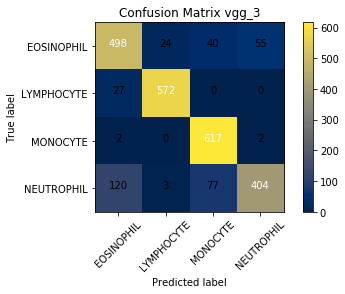

In [25]:
predict(model ,'vgg_3',testing_generator,2441,batch_size)

In [26]:
model1 = load_model('vgg16_2.h5')

In [27]:
testing_generator = test_datagen.flow_from_directory(
            test_path,
            target_size= (150,150),
            batch_size=batch_size,
            shuffle = False,
            class_mode='categorical')

Found 2441 images belonging to 4 classes.


              precision    recall  f1-score   support

  EOSINOPHIL       0.83      0.93      0.88       617
  LYMPHOCYTE       0.99      0.96      0.98       599
    MONOCYTE       0.93      1.00      0.96       621
  NEUTROPHIL       0.93      0.78      0.85       604

   micro avg       0.92      0.92      0.92      2441
   macro avg       0.92      0.92      0.92      2441
weighted avg       0.92      0.92      0.92      2441

Confusion matrix, without normalization
[[574   3  11  29]
 [ 15 578   1   5]
 [  2   0 618   1]
 [103   1  31 469]]


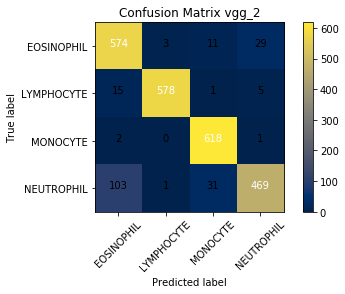

In [28]:
predict(model ,'vgg_2',testing_generator,2441,batch_size)

In [29]:
model1 = load_model('vgg16_1.h5')

In [30]:
testing_generator = test_datagen.flow_from_directory(
            test_path,
            target_size= (80,60),
            batch_size=batch_size,
            shuffle = False,
            class_mode='categorical')

Found 2441 images belonging to 4 classes.


              precision    recall  f1-score   support

  EOSINOPHIL       0.72      0.76      0.74       617
  LYMPHOCYTE       0.88      0.81      0.85       599
    MONOCYTE       0.85      0.88      0.86       621
  NEUTROPHIL       0.77      0.75      0.76       604

   micro avg       0.80      0.80      0.80      2441
   macro avg       0.80      0.80      0.80      2441
weighted avg       0.80      0.80      0.80      2441

Confusion matrix, without normalization
[[470  66  13  68]
 [ 38 488  69   4]
 [ 15   0 545  61]
 [132   1  16 455]]


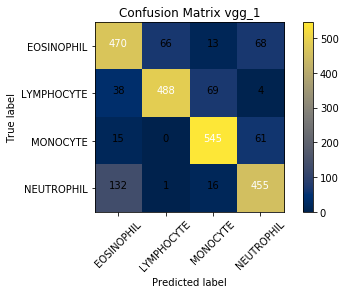

In [32]:
predict(model1 ,'vgg_1',testing_generator,2441,batch_size)